***TRYING DIFFERENT MLP ARCHITECTURE ON MNIST DATASET USING KERAS***

In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
import keras

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
X_train.shape #it is 3d so we convert it into 2d

(60000, 28, 28)

In [0]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [0]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [0]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [0]:
# here we are having a class number for each image
print("Class label of first image :", y_train[1])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[1])

Class label of first image : 0
After converting the output into a vector :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


**Softmax** **Classifier**

In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 

In [0]:
out_dim=10
input_dim=X_train.shape[1]
Batch_size=100
no_epoch=20

**MLP+ReLu Activation+Adam optimizer**

In [0]:
model_relu=Sequential()
model_relu.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_relu.add(Dense(200, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=None)) )
model_relu.add(Dense(out_dim, activation='softmax'))
model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_21 (Dense)             (None, 200)               120200    
_________________________________________________________________
dense_22 (Dense)             (None, 10)                2010      
Total params: 593,210
Trainable params: 593,210
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=Batch_size, epochs=no_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 192us/step - loss: 0.2101 - acc: 0.9387 - val_loss: 0.1114 - val_acc: 0.9643
Epoch 2/20
60000/60000 [==============================] - 11s 175us/step - loss: 0.0793 - acc: 0.9756 - val_loss: 0.0701 - val_acc: 0.9784
Epoch 3/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.0487 - acc: 0.9851 - val_loss: 0.0898 - val_acc: 0.9721
Epoch 4/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.0363 - acc: 0.9883 - val_loss: 0.0637 - val_acc: 0.9798
Epoch 5/20
60000/60000 [==============================] - 10s 175us/step - loss: 0.0255 - acc: 0.9918 - val_loss: 0.0697 - val_acc: 0.9781
Epoch 6/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.0229 - acc: 0.9926 - val_loss: 0.0684 - val_acc: 0.9799
Epoch 7/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.0174 - acc: 0.9940 - val_loss: 0.

[0.09291481261994809, 0.9815]
Test score: 0.09291481261994809
Test accuracy: 0.9815


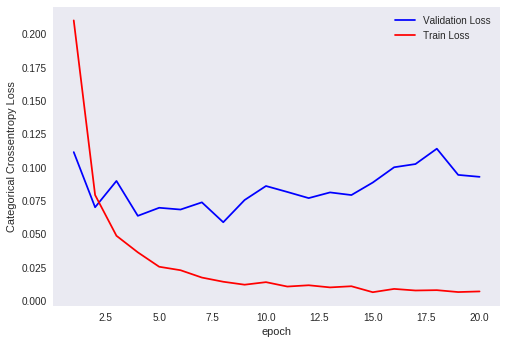

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print(score)
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,no_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


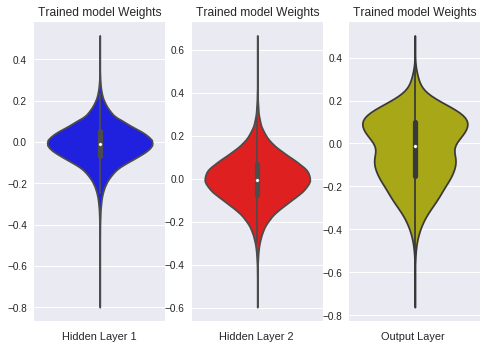

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**MLP+ReLu Activation+Adam optimizer+BN+Dropout **

In [0]:
from keras.layers import Dropout
from keras.layers import BatchNormalization
model_relu=Sequential()
model_relu.add(Dense(600, activation='relu', input_shape=(input_dim,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(200, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(out_dim, activation='softmax'))
model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 600)               471000    
_________________________________________________________________
batch_normalization_11 (Batc (None, 600)               2400      
_________________________________________________________________
dropout_11 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 200)               120200    
_________________________________________________________________
batch_normalization_12 (Batc (None, 200)               800       
_________________________________________________________________
dropout_12 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                2010      
Total para

In [0]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=Batch_size, epochs=no_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 261us/step - loss: 0.3764 - acc: 0.8854 - val_loss: 0.1267 - val_acc: 0.9604
Epoch 2/20
60000/60000 [==============================] - 14s 233us/step - loss: 0.1894 - acc: 0.9431 - val_loss: 0.0995 - val_acc: 0.9685
Epoch 3/20
60000/60000 [==============================] - 14s 232us/step - loss: 0.1458 - acc: 0.9558 - val_loss: 0.0886 - val_acc: 0.9728
Epoch 4/20
60000/60000 [==============================] - 14s 232us/step - loss: 0.1301 - acc: 0.9603 - val_loss: 0.0774 - val_acc: 0.9742
Epoch 5/20
60000/60000 [==============================] - 14s 230us/step - loss: 0.1154 - acc: 0.9637 - val_loss: 0.0751 - val_acc: 0.9757
Epoch 6/20
60000/60000 [==============================] - 14s 227us/step - loss: 0.1035 - acc: 0.9680 - val_loss: 0.0728 - val_acc: 0.9766
Epoch 7/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.0949 - acc: 0.9698 - val_loss: 0.

Test score: 0.054750559619220436
Test accuracy: 0.9826


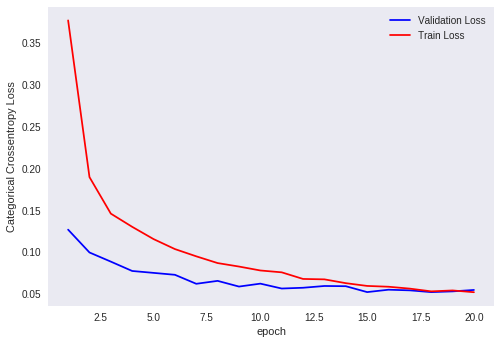

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,no_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


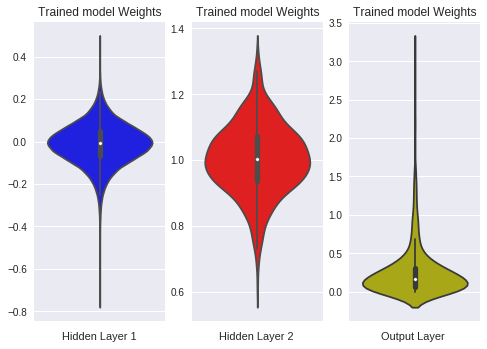

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**MLP+Relu Function+Adam+ with 3 hidden layers**



In [0]:
#Here I am just changing the size of batches and hidden layers

In [0]:
out_dim=10
input_dim=X_train.shape[1]
Batch_size=150
no_epoch=10

In [0]:
model_relu=Sequential()
model_relu.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(200, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(70,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(out_dim, activation='softmax'))
model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 500)               392500    
_________________________________________________________________
batch_normalization_13 (Batc (None, 500)               2000      
_________________________________________________________________
dropout_13 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 200)               100200    
_________________________________________________________________
batch_normalization_14 (Batc (None, 200)               800       
_________________________________________________________________
dropout_14 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 70)                14070     
__________

In [0]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=Batch_size, epochs=no_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.6583 - acc: 0.7999 - val_loss: 0.1797 - val_acc: 0.9445
Epoch 2/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.2831 - acc: 0.9181 - val_loss: 0.1258 - val_acc: 0.9618
Epoch 3/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.2128 - acc: 0.9392 - val_loss: 0.1080 - val_acc: 0.9646
Epoch 4/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.1825 - acc: 0.9486 - val_loss: 0.0983 - val_acc: 0.9695
Epoch 5/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.1597 - acc: 0.9544 - val_loss: 0.0883 - val_acc: 0.9741
Epoch 6/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.1416 - acc: 0.9595 - val_loss: 0.0845 - val_acc: 0.9747
Epoch 7/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.1260 - acc: 0.9629 - val_loss: 0.

Test score: 0.07119153595929965
Test accuracy: 0.981


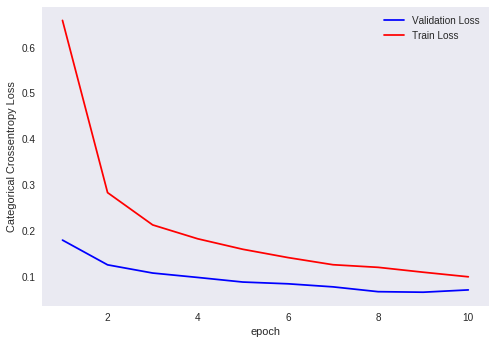

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,no_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


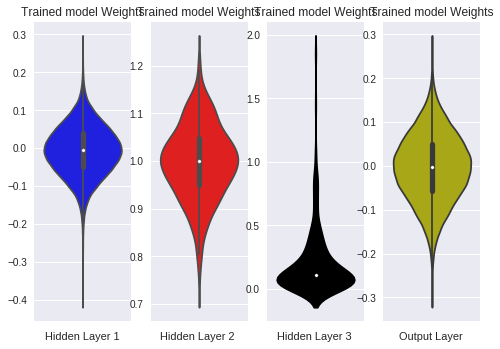

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w=w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='black')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**MLP+Relu Function+Adam+ with 5 hidden layers**

In [93]:
model_relu=Sequential()
model_relu.add(Dense(700, activation='relu', input_shape=(input_dim,), kernel_initializer=keras.initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(500, activation='relu', kernel_initializer=keras.initializers.he_normal(seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(250,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(150,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(70,activation='relu',kernel_initializer=keras.initializers.he_normal(seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(out_dim, activation='softmax'))
model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 700)               549500    
_________________________________________________________________
batch_normalization_16 (Batc (None, 700)               2800      
_________________________________________________________________
dropout_16 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 500)               350500    
_________________________________________________________________
batch_normalization_17 (Batc (None, 500)               2000      
_________________________________________________________________
dropout_17 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 250)               125250    
__________

In [94]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=Batch_size, epochs=no_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 403us/step - loss: 1.0422 - acc: 0.6796 - val_loss: 0.2234 - val_acc: 0.9349
Epoch 2/10
60000/60000 [==============================] - 21s 352us/step - loss: 0.3479 - acc: 0.9049 - val_loss: 0.1593 - val_acc: 0.9561
Epoch 3/10
60000/60000 [==============================] - 21s 354us/step - loss: 0.2523 - acc: 0.9328 - val_loss: 0.1233 - val_acc: 0.9664
Epoch 4/10
60000/60000 [==============================] - 21s 352us/step - loss: 0.2124 - acc: 0.9440 - val_loss: 0.1109 - val_acc: 0.9700
Epoch 5/10
60000/60000 [==============================] - 22s 359us/step - loss: 0.1858 - acc: 0.9509 - val_loss: 0.0996 - val_acc: 0.9730
Epoch 6/10
60000/60000 [==============================] - 21s 357us/step - loss: 0.1613 - acc: 0.9578 - val_loss: 0.0910 - val_acc: 0.9752
Epoch 7/10
60000/60000 [==============================] - 21s 356us/step - loss: 0.1493 - acc: 0.9604 - val_loss: 0.

Test score: 0.07527452613576316
Test accuracy: 0.9802


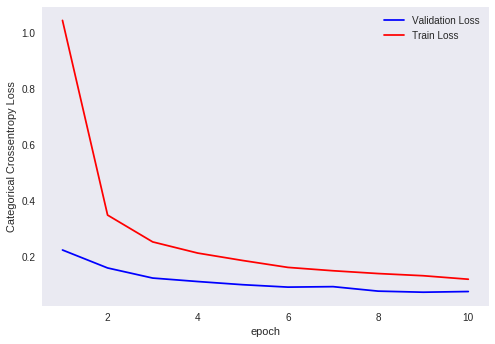

In [95]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,no_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


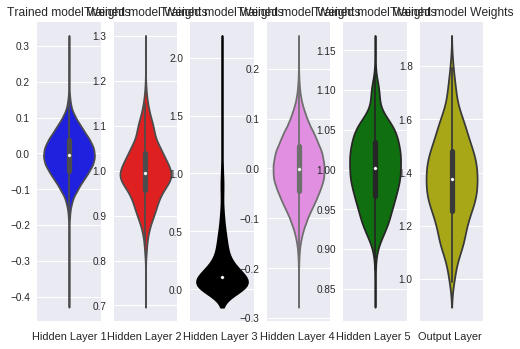

In [97]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w=w_after[4].flatten().reshape(-1,1)
h4_w=w_after[6].flatten().reshape(-1,1)
h5_w=w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='black')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='violet')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='green')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [99]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Hidden layers","Test score","Test accuracy","no_of_epoch"]

x.add_row(["2","5.4","98","20"])
x.add_row(["3","7.1","98.1","10"])
x.add_row(["5","7.5","98","10"])


print(x)

+---------------+------------+---------------+-------------+
| Hidden layers | Test score | Test accuracy | no_of_epoch |
+---------------+------------+---------------+-------------+
|       2       |    5.4     |       98      |      20     |
|       3       |    7.1     |      98.1     |      10     |
|       5       |    7.5     |       98      |      10     |
+---------------+------------+---------------+-------------+


**Conclusion:**
                    
                    1)There is no biggest change in both test score and accuracy for the three different  layers(2,3,5)
                    2)And moreover here we are using Adam optimizer,Relu function and also we have used Batch normalaization and drop outs
                    3)Without using Batch normalization ad dropouts I got 9.4 test score.